In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import folium
conn = sqlite3.connect('soil_test_database')
c = conn.cursor()

c.execute('''  
SELECT * 
FROM soil_wetness
          ''')
wetness = pd.DataFrame(c.fetchall(),columns=['YEAR','January','February', 'March', 'April','May','June','July','August','September','October','November','December','Annual Average','Name'])
wetness.head()


,YEAR,January,February,March,April,May,June,July,August,September,October,November,December,Annual Average,Name
0,2011,0.80,0.80,0.86,0.84,0.70,0.58,0.48,0.29,0.17,0.44,0.48,0.48,0.58,Alameda
1,2012,0.51,0.55,0.62,0.69,0.53,0.42,0.23,0.16,0.13,0.24,0.50,0.76,0.45,Alameda
2,2013,0.82,0.77,0.69,0.57,0.46,0.26,0.17,0.15,0.22,0.23,0.30,0.48,0.42,Alameda
3,2014,0.46,0.53,0.60,0.57,0.48,0.27,0.17,0.14,0.20,0.27,0.48,0.79,0.41,Alameda
4,2015,0.83,0.82,0.73,0.59,0.50,0.41,0.21,0.16,0.14,0.20,0.49,0.59,0.47,Alameda


In [3]:
wetness_map = wetness
wetness_map['YEAR'] = wetness_map['YEAR'].astype('str')


wetness_map['Month'] = '1'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month','Day']], format = '%Y-%m')
Jandf = wetness_map[["January",'Date','Name']]
Jandf = Jandf.rename(columns={'January':'Value'})

wetness_map['Month'] = '2'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month','Day']], format = '%Y-%m')
Febdf = wetness_map[["February",'Date','Name']]
Febdf = Febdf.rename(columns={'February':'Value'})

wetness_map['Month'] = '3'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month','Day']], format = '%Y-%m')
Mardf = wetness_map[["March",'Date','Name']]
Mardf = Mardf.rename(columns={'March':'Value'})

wetness_map['Month'] = '4'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month','Day']], format = '%Y-%m')
Aprdf = wetness_map[["April",'Date','Name']]
Aprdf = Aprdf.rename(columns={'April':'Value'})

wetness_map['Month'] = '5'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month','Day']], format = '%Y-%m')
Maydf = wetness_map[["May",'Date','Name']]
Maydf = Maydf.rename(columns={'May':'Value'})

wetness_map['Month'] = '6'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month','Day']], format = '%Y-%m')
Jundf = wetness_map[["June",'Date','Name']]
Jundf = Jundf.rename(columns={'June':'Value'})

wetness_map['Month'] = '7'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month','Day']], format = '%Y-%m')
Juldf = wetness_map[["July",'Date','Name']]
Juldf = Juldf.rename(columns={'July':'Value'})

wetness_map['Month'] = '8'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month','Day']], format = '%Y-%m')
Augdf = wetness_map[["August",'Date','Name']]
Augdf = Augdf.rename(columns={'August':'Value'})

wetness_map['Month'] = '9'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month','Day']], format = '%Y-%m')
Sepdf = wetness_map[["September",'Date','Name']]
Sepdf = Sepdf.rename(columns={'September':'Value'})

wetness_map['Month'] = '10'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month', 'Day']],format = '%Y-%m')
Octdf = wetness_map[["October",'Date','Name']]
Octdf = Octdf.rename(columns={'October':'Value'})

wetness_map['Month'] = '11'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month','Day']], format = '%Y-%m')
Novdf = wetness_map[["November",'Date','Name']]
Novdf = Novdf.rename(columns={'November':'Value'})

wetness_map['Month'] = '12'
wetness_map['Day'] = '1'
wetness_map['Date'] = pd.to_datetime(wetness_map[['YEAR','Month','Day']], format = '%Y-%m')
Decdf = wetness_map[["December",'Date','Name']]
Decdf = Decdf.rename(columns={'December':'Value'})


mapdatadf = pd.concat([Jandf,Febdf,Mardf,Aprdf,Maydf,Jundf,Juldf,Augdf,Sepdf,Octdf,Novdf,Decdf])

In [4]:
mapdatadf['Date'].dtype

dtype('<M8[ns]')

In [5]:
mapdatadf["Date"] = mapdatadf["Date"].astype('datetime64[ns]')


In [6]:
mapdatadf['Year'] = pd.DatetimeIndex(mapdatadf['Date']).year
mapdatadf['Month'] = pd.DatetimeIndex(mapdatadf['Date']).month

In [7]:
mapdatadf

,Value,Date,Name,Year,Month
0,0.80,2011-01-01,Alameda,2011,1
1,0.51,2012-01-01,Alameda,2012,1
2,0.82,2013-01-01,Alameda,2013,1
3,0.46,2014-01-01,Alameda,2014,1
4,0.83,2015-01-01,Alameda,2015,1
...,...,...,...,...,...
633,0.39,2017-12-01,Merced,2017,12
634,0.52,2018-12-01,Merced,2018,12
635,0.55,2019-12-01,Merced,2019,12
636,0.38,2020-12-01,Merced,2020,12


In [8]:
mapdatadf['Value'] = mapdatadf['Value'] * 100

In [9]:
mapdatadf

,Value,Date,Name,Year,Month
0,80.0,2011-01-01,Alameda,2011,1
1,51.0,2012-01-01,Alameda,2012,1
2,82.0,2013-01-01,Alameda,2013,1
3,46.0,2014-01-01,Alameda,2014,1
4,83.0,2015-01-01,Alameda,2015,1
...,...,...,...,...,...
633,39.0,2017-12-01,Merced,2017,12
634,52.0,2018-12-01,Merced,2018,12
635,55.0,2019-12-01,Merced,2019,12
636,38.0,2020-12-01,Merced,2020,12


In [10]:
import numpy as np
for column in mapdatadf.columns:
    try:
        mapdatadf[column] = np.log(mapdatadf[column])
    except (ValueError, AttributeError):
        pass

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [11]:
mapdatadf["Annual Average"] = wetness_map['Annual Average']

In [12]:
mapdatadf

,Value,Date,Name,Year,Month,Annual Average
0,4.382027,2011-01-01,Alameda,2011,1,0.58
1,3.931826,2012-01-01,Alameda,2012,1,0.45
2,4.406719,2013-01-01,Alameda,2013,1,0.42
3,3.828641,2014-01-01,Alameda,2014,1,0.41
4,4.418841,2015-01-01,Alameda,2015,1,0.47
...,...,...,...,...,...,...
633,3.663562,2017-12-01,Merced,2017,12,0.41
634,3.951244,2018-12-01,Merced,2018,12,0.30
635,4.007333,2019-12-01,Merced,2019,12,0.37
636,3.637586,2020-12-01,Merced,2020,12,0.30


In [15]:
alamedatimesdf = mapdatadf.loc[mapdatadf['Name']=='Alameda']
alamedatimesdf = alamedatimesdf.sort_values(by=['Date'])


In [16]:
alamedatimesdf

,Value,Date,Name,Year,Month,Annual Average
0,4.382027,2011-01-01,Alameda,2011,1,0.58
0,4.382027,2011-02-01,Alameda,2011,2,0.58
0,4.454347,2011-03-01,Alameda,2011,3,0.58
0,4.430817,2011-04-01,Alameda,2011,4,0.58
0,4.248495,2011-05-01,Alameda,2011,5,0.58
...,...,...,...,...,...,...
10,2.564949,2021-08-01,Alameda,2021,8,0.42
10,2.564949,2021-09-01,Alameda,2021,9,0.42
10,3.465736,2021-10-01,Alameda,2021,10,0.42
10,4.158883,2021-11-01,Alameda,2021,11,0.42


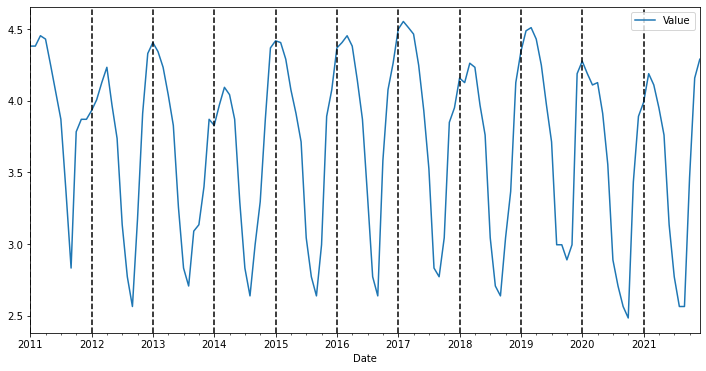

In [17]:
ax = alamedatimesdf.plot(x='Date', y='Value', figsize=(12,6))
xcoords = ['2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01', '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
          '2021-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

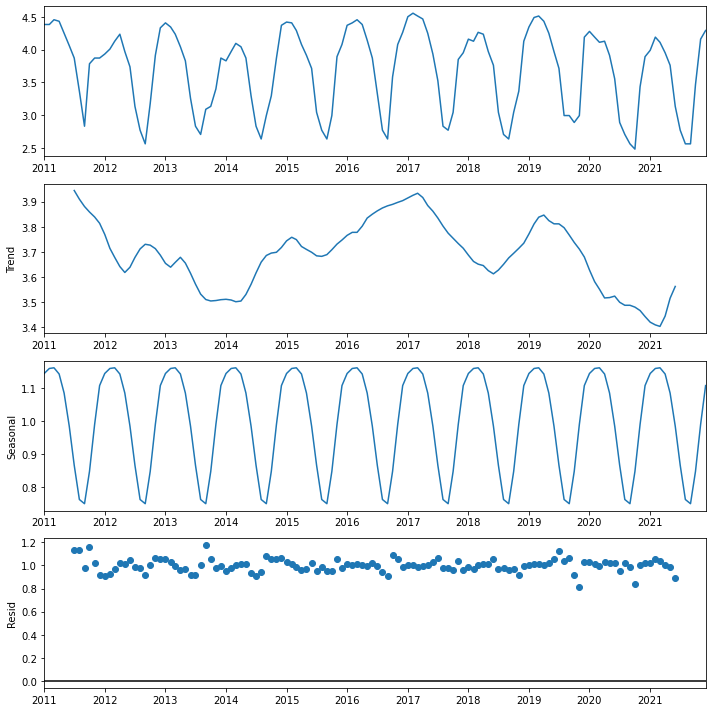

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

alamedatimesdf = mapdatadf.loc[mapdatadf['Name']=='Alameda']
alamedatimesdf = alamedatimesdf.sort_values(by=['Date'])

alamedatimesdf.set_index('Date', inplace=True)

analysis = alamedatimesdf[['Value']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")
observed =  decompose_result_mult.observed
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

fig = decompose_result_mult.plot()
fig.set_size_inches((10,10))
fig.tight_layout()
plt.show()

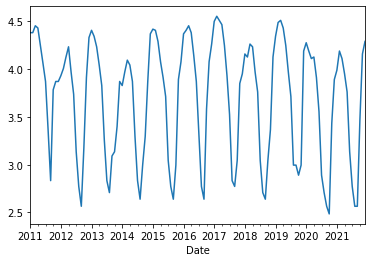

In [36]:
fig = observed.plot()

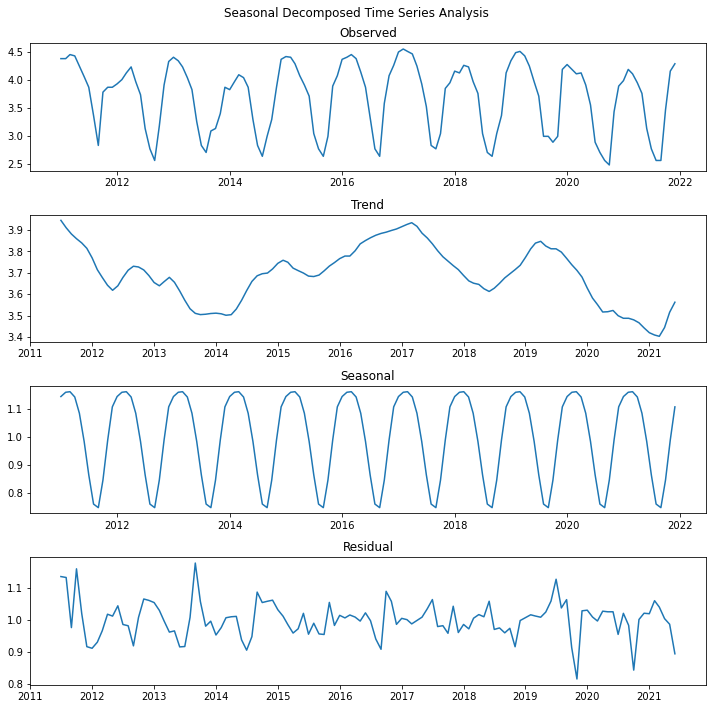

In [43]:
fig,ax = plt.subplots(4)
fig.suptitle('Seasonal Decomposed Time Series Analysis')
ax[0].plot(observed)
ax[0].set_title('Observed')

ax[1].plot(trend)
ax[1].set_title("Trend")

ax[2].plot(seasonal)
ax[2].set_title("Seasonal")

ax[3].plot(residual)
ax[3].set_title("Residual")
fig.set_size_inches((10,10))
fig.tight_layout()
plt.show()

In [5]:
folium_version

NameError: name 'folium_version' is not defined

In [15]:
import streamlit_folium as pd
import statsmodels
print(statsmodels.__version__)
# 0.22.0

0.13.2
